Making the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

immo = pd.read_csv("../data/_data_clean_to_model.csv", index_col='id')
display(immo.head())
display(immo.shape)

,price,floor,bedroomCount,netHabitableSurface,constructionYear,facadeCount,floorCount,hasLift,hasGarden,gardenSurface,...,A,A+,A++,B,C,D,E,F,G,NO_EPC_SCORE
id,,,,,,,,,,,,,,,,,,,,,
10616910,399000,1.0,2.0,125.0,2013.0,1.0,1.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616911,423000,2.0,3.0,155.0,2014.0,4.0,3.0,1,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616934,169000,0.0,1.0,54.0,1850.0,2.0,2.0,0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
10616833,275000,1.0,1.0,66.0,2025.0,3.0,3.0,1,0,0.0,...,1,0,0,0,0,0,0,0,0,0
10616966,185000,3.0,2.0,74.0,1975.0,1.0,3.0,0,0,0.0,...,0,0,0,0,1,0,0,0,0,0


(10540, 89)

In [2]:
X = pd.DataFrame(immo.drop(columns=['price', 'gardenSurface', 'terraceSurface', 'floor']))
y = np.array(immo.price).reshape(-1, 1)#target

print(X.shape)
print(y.shape)

(10540, 85)
(10540, 1)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

scalar = StandardScaler()

normalized_x_train = np.array(pd.DataFrame(
    scalar.fit_transform(X_train),
    columns = X_train.columns
))

normalized_x_test = np.array(pd.DataFrame(
    scalar.transform(X_test),
    columns = X_test.columns
))

print(X_train.shape); print(X_test.shape)


(7378, 85)
(3162, 85)


In [4]:
import xgboost as xg

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

[16:57:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# training predition 
pred_train= xgb_r.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))
print(r2_score(y_train, pred_train))

# test predition
pred_test= xgb_r.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

162915.78559024035
0.8422682285168319
246532.40749331104
0.6227994921288555


In [12]:
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, pred_test))
print("RMSE : % f" %(rmse))

RMSE :  246532.407493


<Axes: >

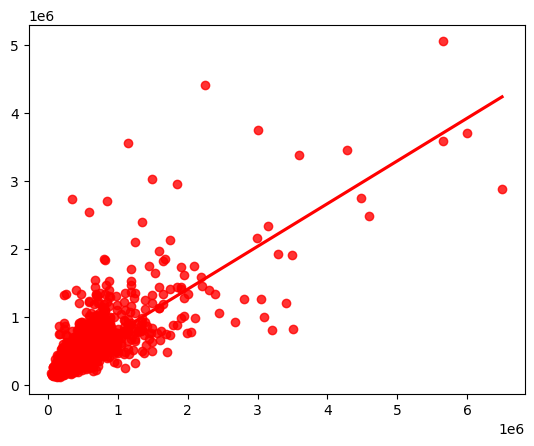

In [13]:
sns.regplot(x=y_test,y=pred_test,ci=None,color ='red')